In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [134]:
data = pd.read_table('TH_data_challenge.tsv')

### Examining the data:

The data consists of 184279 rows by 46 columns. 38 of 46 variables in the data are numerical (float or int object). two variables are of the boolean type including the target variable *dim_is_requested*. There are just two categorical variables *dim_market and dim_room_type* 
    

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184279 entries, 0 to 184278
Data columns (total 46 columns):
dim_is_requested                                      184279 non-null bool
ds_night                                              184279 non-null object
ds                                                    184279 non-null object
id_listing_anon                                       184279 non-null object
id_user_anon                                          184279 non-null object
m_effective_daily_price                               184279 non-null float64
m_pricing_cleaning_fee                                184279 non-null float64
dim_market                                            184279 non-null object
dim_lat                                               184279 non-null float64
dim_lng                                               184279 non-null float64
dim_room_type                                         184279 non-null object
dim_person_capacity                     

Investigating Nulls

We see that m_reviews and m_checkout have the same number of nulls. this suggests that for this rooms the very first time of booking them was on ds. we would go ahead and replace the null values here with zeros. Also we can see that only the numerical features in the data contain nulls. Using the logic above it is likely there were indeed no field for each numerical feature that contains null. For now we would go ahead and replace all fields of all numerical feature that contains null with zero.

In [135]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
p3_inquiry_score,129290,0.701599
p2_p3_click_through_score,127110,0.689769
days_since_last_booking,37836,0.205319
price_booked_most_recent,37836,0.205319
occ_occupancy_plus_minus_7_ds_night,20727,0.112476
occ_occupancy_plus_minus_14_ds_night,20652,0.112069
image_quality_score,14011,0.076031
r_kdt_m_effective_daily_price_booked_n100_p50,12975,0.070410
occ_occupancy_trailing_90_ds,10218,0.055449
listing_m_listing_views_2_6_ds_night_decay,2346,0.012731


Data Types

In this step, We would be converting each data type as what they are. 

Categorical data

* dim_is_requested
* dim_market
* dim_room_type

Date data type
* ds_night 
* ds


In [136]:
categorical_features = [
   'dim_is_requested', 'dim_market', 'dim_room_type','ds_night_day_of_week','dim_is_instant_bookable'
]

for categorical_feature in categorical_features:
    data[categorical_feature] = data[categorical_feature].astype('category')
data['ds_night'] = pd.to_datetime(data['ds_night'])
data['ds'] = pd.to_datetime(data['ds'])


Replacing nulls

In [137]:
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols = data.select_dtypes(include = numerics).columns
data[cols] = data[cols].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184279 entries, 0 to 184278
Data columns (total 46 columns):
dim_is_requested                                      184279 non-null category
ds_night                                              184279 non-null datetime64[ns]
ds                                                    184279 non-null datetime64[ns]
id_listing_anon                                       184279 non-null object
id_user_anon                                          184279 non-null object
m_effective_daily_price                               184279 non-null float64
m_pricing_cleaning_fee                                184279 non-null float64
dim_market                                            184279 non-null category
dim_lat                                               184279 non-null float64
dim_lng                                               184279 non-null float64
dim_room_type                                         184279 non-null category
dim_person_capac

#### correlation matrix
Checking to see how our data correlates with each other. 40 features in our data have numeric property. we are checking to see how features correlates with each other with an especial focus on our target variable- the dim_is_requested variable. we would like to see how other variables correlate with it. Using spearman correlation approach we created a two way contigency tables of correlation values and plotted it using a heatmap.

From the heatmap below can see the variables 

*occ_occupancy_trailing_90_ds','listing_m_listing_views_2_6_ds_night_decay', 'm_checkouts',
'm_total_overall_rating', 'm_reviews', 'days_since_last_booking', 'occ_occupancy_plus_minus_14_ds_night', 'occ_occupancy_plus_minus_7_ds_night', 'm_available_listings_ds_night','m_effective_daily_price', 'r_kdt_listing_views_0_6_avg_n100',*

shows fair correlation with dim_is_requested when compared with others. they seem to be important variables to keep in the model. we will now go on to see how some of this variables behave with*dim_is_requested.*


In [6]:
corr = data.corr(method = 'spearman')

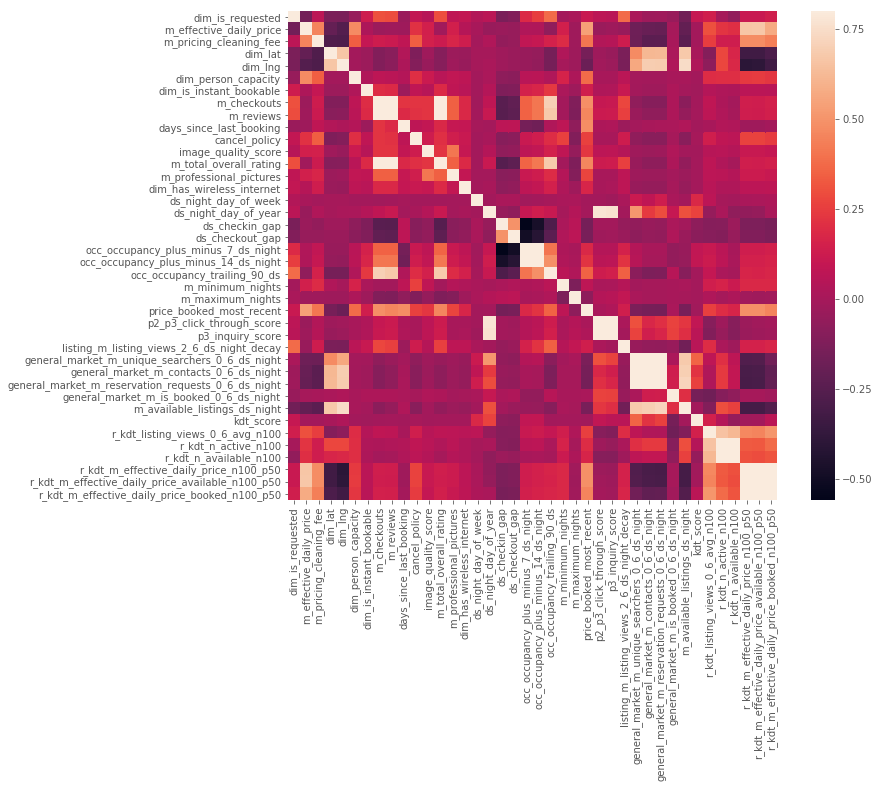

In [7]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True); #m_checkouts, m_reviews, 

Printing top ten correlated values with dim_is_requested. since correlation ranges from -1 to +1, albsolute value or the correlation series was taken in order to take into consideration the negative values.

In [8]:
print("Top 10 correlated values with dim_is_requested")
corr['dim_is_requested'].abs().sort_values(ascending = False).head(10)

Top 10 correlated values with dim_is_requested


dim_is_requested                              1.000000
occ_occupancy_trailing_90_ds                  0.376138
listing_m_listing_views_2_6_ds_night_decay    0.375925
m_checkouts                                   0.303430
m_total_overall_rating                        0.297667
m_reviews                                     0.294515
occ_occupancy_plus_minus_14_ds_night          0.249134
occ_occupancy_plus_minus_7_ds_night           0.185553
m_available_listings_ds_night                 0.160653
m_effective_daily_price                       0.159091
Name: dim_is_requested, dtype: float64

In [9]:
data['dim_is_requested'].value_counts()

False    123769
True      60510
Name: dim_is_requested, dtype: int64

### Behavior of some Numerical variables with dim_is_requested

Several numerical variables from the data show interesting relationship with the *dim_is_requested* feature. From the boxplots below, out of top 9 most correlated variables with *dim_is_requested* only *m_available_listings_ds_night* shows negative correlation with *dim_is_requested*. It is worthy to note that listings with higher reviews, monthly overal ratings and checkouts tends to be eventually booked.

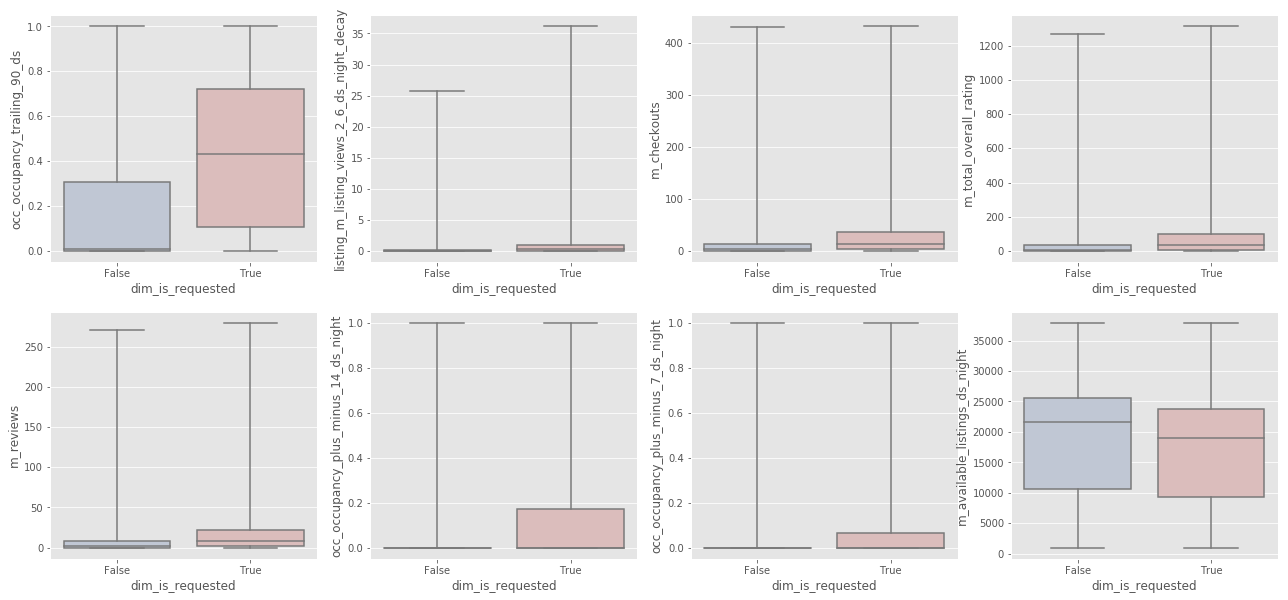

In [138]:
import seaborn as sns
from matplotlib.colors import Colormap
var = [ 'occ_occupancy_trailing_90_ds',
       'listing_m_listing_views_2_6_ds_night_decay', 'm_checkouts',
       'm_total_overall_rating', 'm_reviews',
       'occ_occupancy_plus_minus_14_ds_night',
       'occ_occupancy_plus_minus_7_ds_night', 'm_available_listings_ds_night']

fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(22, 10))
def Subplot(var, axis, ax_num):
    sns.boxplot(x='dim_is_requested', y=var, data=data, ax=axis.reshape(-1)[ax_num],  whis="range", palette="vlag")
    #plt.subplots_adjust(left  = 0.8, right = 1.6, bottom = 0.1, top = 1.0, wspace = 0.5,hspace = 1.0)

    #axis.set_ylim([0, 60])
for i, va in enumerate(var):
    Subplot(va, ax, i)
    

### Categorical Features:

Here are some observations from the plots below.
* There is a higher tendency for a house to be booked at on ds_night at San Francisco than other states.
* Shared room and Entire Apt results in additional booking than privte apartment
* If a listing is instant bookable, It tends to be eventually booked on ds_night compared to when it is not instant bookable

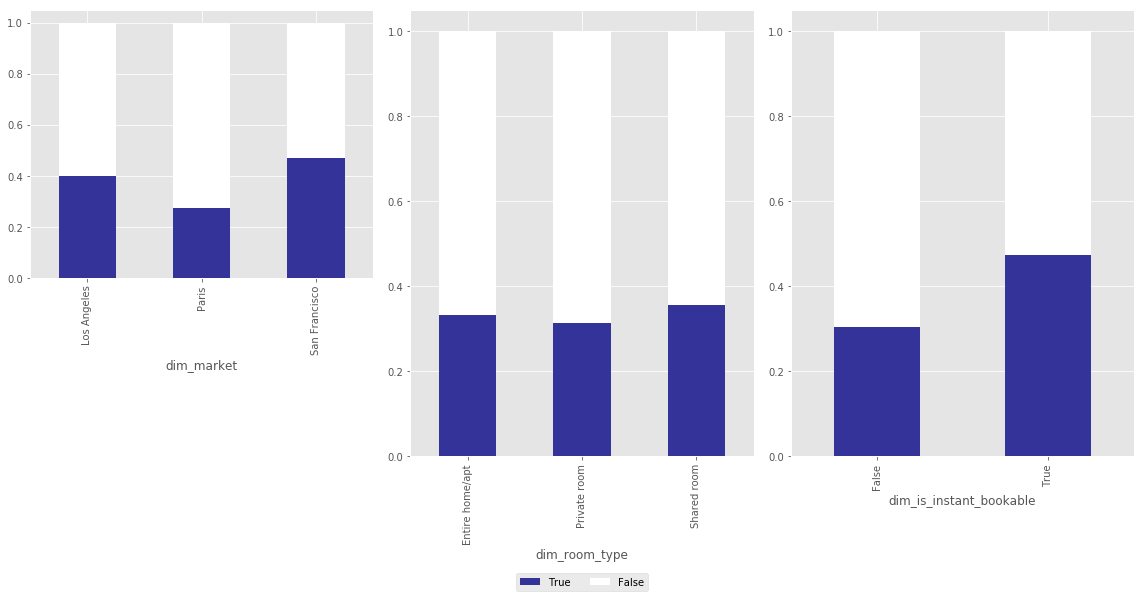

In [139]:
bar_order = ['True','False']
cat_vars = ['dim_market', 'dim_room_type','dim_is_instant_bookable']
from matplotlib.colors import Colormap
fig, ax4 = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
def pltCatVar(var,axis,ax_num):
    ctab = pd.crosstab([data[var]], data.dim_is_requested.apply(str)).apply(lambda x: x/x.sum(), axis=1)
    ctab[bar_order].plot(kind='bar', stacked=True, ax=axis.reshape(-1)[ax_num],legend=False, 
                         colormap='terrain')
for i,var in enumerate(cat_vars):
    pltCatVar(var,ax4,i)
plt.tight_layout()
box = ax4[0].get_position()
ax4[0].set_position([box.x0, box.y0 + box.height * 0.4, box.width, box.height * 0.6])
ax4[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=6)

### Days of the week

Here we examine the Behaviour of dim_is_requested by days of the week. There is an **interesing** result here. As the week draws to an end, listing tend to be more booked. listings on Thursday, Friday and Saturday tend to be booked when compared to listings on other days of the week.

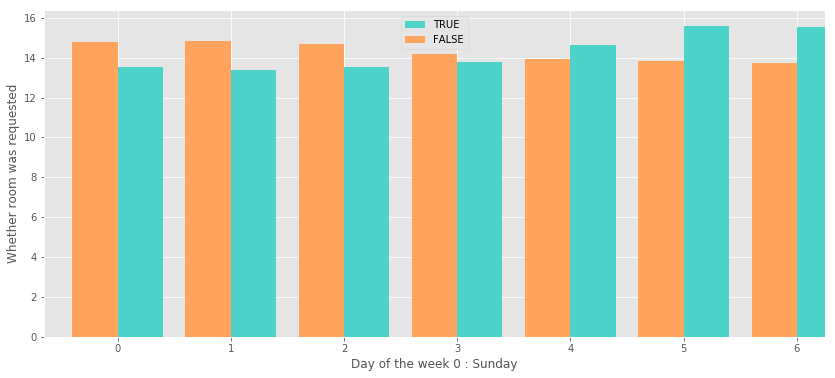

In [140]:
tru = sum(data['dim_is_requested'] == True)
fal = sum(data['dim_is_requested'] == False)

truDay = data.loc[data['dim_is_requested'] == True, "ds_night_day_of_week"].value_counts() / tru * 100
truDay = truDay.sort_index()
falDay = data.loc[data['dim_is_requested'] == False, "ds_night_day_of_week"].value_counts() / fal * 100
falDay = falDay.sort_index()
width = 0.4

plt.figure(figsize = (14,6))

truDay.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='TRUE', rot=0)
falDay.plot(kind='bar', width=width, color='#FFA35D', position=1, label='FALSE', rot=0)
plt.legend()
plt.xlabel('Day of the week 0 : Sunday')
plt.ylabel('Whether room was requested')

sns.despine()
plt.show()

### Creating New feature

* Month name

We created a new feature called monthname plotted a barchart of the number of listing per month. January seems to have the highest amount of listing followed closely by March and August. June however had the lowest amount of listing from our data

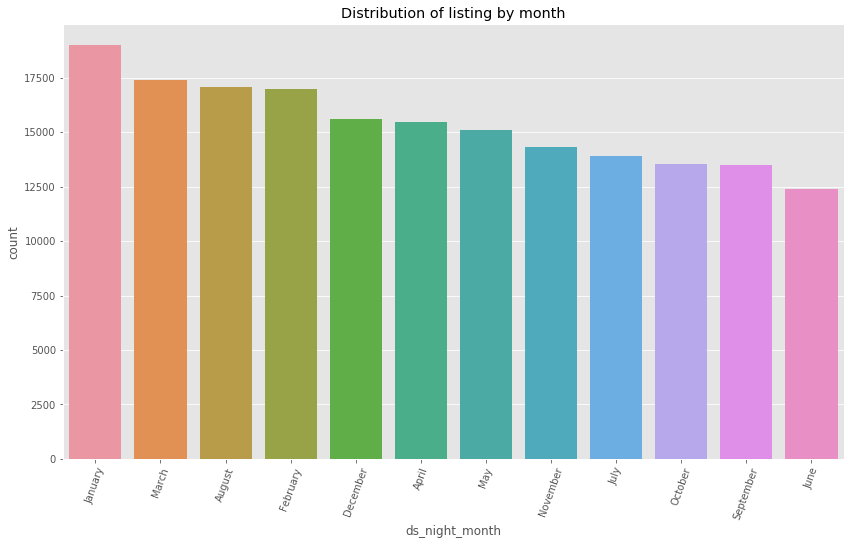

In [141]:
data['ds_night_month'] = pd.DatetimeIndex(data['ds_night']).month_name()
data.ds_night_month.value_counts()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
sns.countplot(x = 'ds_night_month', data =  data, ax = ax, order = data.ds_night_month.value_counts().index)
ax.set_title('Distribution of listing by month')
ax.set_xticklabels(data.ds_night_month.value_counts().index, rotation=70)
plt.show()


### Examining dim_is_requested by Month of the year

There is yet another interesting observation from the combination of the chart below and the preceeding chart. Months with high amount of listing (eg January, March, August) tend to be less booked on ds_night- the calendar night, while months with lower amount of listing(e.g. June, September, October) shows high tendency of being booked on ds_night - the calender night. The former could be due to the fact that the data distribution is itself unbalanced - The number of listing eventually booked is half the amount of listing booked( # of True = 60510, # of False = 123769)



April         8.312676
August        8.068088
December      6.478268
February      6.886465
January       7.742522
July          8.228392
June          9.269542
March         8.340770
May           8.430012
November      7.816890
October      10.277640
September    10.148736
Name: ds_night_month, dtype: float64
April         8.448804
August        9.856264
December      9.424816
February     10.347502
January      11.578828
July          7.202127
June          5.465827
March         9.970186
May           8.067448
November      7.755577
October       5.930403
September     5.952217
Name: ds_night_month, dtype: float64


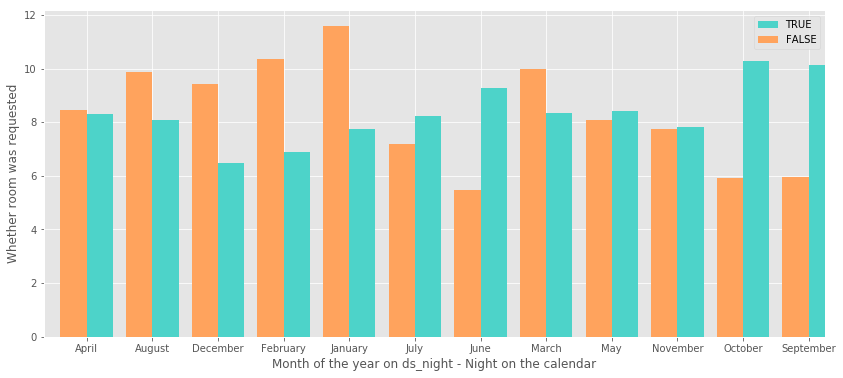

In [142]:
tru = sum(data['dim_is_requested'] == True)
fal = sum(data['dim_is_requested'] == False)

truM = data.loc[data['dim_is_requested'] == True, "ds_night_month"].value_counts() / tru * 100
truM = truM.sort_index()
print(truM)
falM = data.loc[data['dim_is_requested'] == False, "ds_night_month"].value_counts() / fal * 100
falM = falM.sort_index()
width = 0.4
print(falM)

plt.figure(figsize = (14,6))

truM.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='TRUE', rot=0)
falM.plot(kind='bar', width=width, color='#FFA35D', position=1, label='FALSE', rot=0)
plt.legend()
plt.xlabel('Month of the year on ds_night - Night on the calendar')
plt.ylabel('Whether room was requested')

sns.despine()
plt.show()

In [145]:
drop_list = [
    'ds_night',
    'ds',
]

data.drop(drop_list, axis=1, inplace=True)

 ## Modelling

#### Encoding Categorical features:

There is a need to encode the categorical features in our dataset as numeric in order to use them in Machine Learning models

In [172]:
from sklearn.preprocessing import LabelEncoder
categorical_features = [
    'dim_market', 'dim_room_type','ds_night_day_of_week','ds_night_month','dim_is_instant_bookable'
]
data1 = data.copy(deep=True)
encode = LabelEncoder()
for j in categorical_features:
    data1[j] = encode.fit_transform(data[j].astype('str'))

#### Feature Selection

In this stage we attempt to remove features that seems to have low contribution to the model. We performed feature selection were we reduced the number of features using a standard sklearn feature extraction library *VarianceThreshold.* VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features

27 features that we would use to build our model are displayed below.

In [295]:
colx = data1.columns.tolist()

rm_list = ['id_listing_anon','id_user_anon','dim_is_requested']

#for x in rm_list:
#    colx.remove(x)
X = data1[~(data1['dim_is_requested'].isnull())][colx]
X.fillna(0, inplace=True)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.8))
sel.fit_transform(X)
idxs = sel.get_support(indices=True)
colo = [X.columns.tolist()[i] for i in idxs]
print(len(colo), 'features would be used in building model')
print()
print ('\n'.join(colo))
for y in rm_list:
    colo.append(y)



27 features would be used in building model

m_effective_daily_price
m_pricing_cleaning_fee
dim_lat
dim_lng
dim_person_capacity
m_checkouts
m_reviews
days_since_last_booking
m_total_overall_rating
m_professional_pictures
ds_night_day_of_year
ds_checkin_gap
ds_checkout_gap
m_minimum_nights
m_maximum_nights
price_booked_most_recent
listing_m_listing_views_2_6_ds_night_decay
general_market_m_unique_searchers_0_6_ds_night
general_market_m_contacts_0_6_ds_night
general_market_m_reservation_requests_0_6_ds_night
m_available_listings_ds_night
r_kdt_listing_views_0_6_avg_n100
r_kdt_n_active_n100
r_kdt_n_available_n100
r_kdt_m_effective_daily_price_n100_p50
r_kdt_m_effective_daily_price_available_n100_p50
r_kdt_m_effective_daily_price_booked_n100_p50


In [296]:
categorical_features_1 = [val for val in categorical_features if val in colo]
data_encode = pd.get_dummies(data[colo], columns=categorical_features_1)
data_encode.to_csv('C:/Users/ogunl/OneDrive/Apsu Spring 2019/Research/ML/Airbnb/users_data_feature.csv')



KeyError: "['id_listing_anon' 'id_user_anon'] not in index"

Drop user Id, make listing ID the index, remove dim_is_requested, used stratify option to make sure the selected data includes represent the distribution of the initial data.

In [211]:
from sklearn.model_selection import train_test_split
data = data_encode
#data.set_index('id_listing_anon', inplace=True)
data.drop([col for col in data.columns if 'id_user_anon' in col],axis=1,inplace=True)
colx = data.columns.tolist()
colx.remove('dim_is_requested')
colx

X_1 = data[(data['dim_is_requested'].isnull())][colx]
X_1
X_1.fillna(0,inplace=True)
X = data[~(data['dim_is_requested'].isnull())][colx]
Y = data[~(data['dim_is_requested'].isnull())]['dim_is_requested']
Y=Y.astype('str')
X.fillna(0,inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42 ,stratify=Y.values)


In [209]:
from time import time
from math import sqrt
import logging
import os
import sys
import csv
import datetime


total = {}
started = {}
model_perf={}

        
def start(key):
    started[key]=time()


def stop(key):
    stop=time()
    start=started.pop(key,None)
    if start:
        if key in total:
            total[key].append(stop-float(start))
        else:
            total[key]=[stop-float(start)]
    else:
        logging.error("stopping non started timer: %s"%key)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
start('logr')
logr = LogisticRegression()
logr.fit(X_train, Y_train)
stop('logr')

C:\Users\ogunl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [207]:
from sklearn.linear_model import LogisticRegression
#start('logr_mlt')
logr_mlt = LogisticRegression(n_jobs=1,multi_class='multinomial',solver='newton-cg')
logr_mlt.fit(X_train, Y_train)
#stop('logr_mlt')

ValueError: Unknown label type: 'unknown'

In [208]:
from sklearn.svm import LinearSVC
#start('svc')
svc = LinearSVC(random_state=42)
svc.fit(X_train, Y_train)
#stop('svc')

ValueError: Unknown label type: 'unknown'